# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
# EXERCICE 1
# INSERT CODE HERE
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
#Supprimer les lignes avec des valeurs manquantes
data = data.dropna()

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
#Supprimez la colonne "nom"

data.drop(['name'], axis = 1, inplace = True)

<ipython-input-5-1ee3c6177e7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['name'], axis = 1, inplace = True)


In [ ]:
#Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
#États-Unis = 0, Japon = 1, Europe = 2

data['origin'] = data['origin'].factorize()[0]
data

<ipython-input-6-f2fd934b1492>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origin'] = data['origin'].factorize()[0]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [ ]:
data['origin'].unique()

array([0, 1, 2])

In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [ ]:
# Exercice 2
# INSERT CODE HERE

In [1]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.select_dtypes(['int', 'float']).columns.drop(['mpg'])
X = data[X]
y = data['mpg']



X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=36, test_size = 0.20)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))



NameError: ignored

# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [ ]:
# Exercice 3
# INSERT CODE HERE
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor().fit(X_test, y_test)

modelDTR




DecisionTreeRegressor()

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE

Xpred = modelDTR.predict(X_test)
pd.DataFrame(Xpred)

,0
0,24.0
1,27.4
2,20.0
3,26.0
4,26.5
...,...
74,34.4
75,25.0
76,10.0
77,13.0


# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [ ]:
# Exercice 5
# INSERT CODE HERE

print(modelDTR.score(X_test, y_test))
print(modelDTR.score(X_train, y_train))

1.0
0.7450782162354979


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [ ]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [ ]:
# Exercice 6
# INSERT CODE HERE

for columns_name, modeltdtr in zip(X, modelDTR.feature_importances_):
    print(f"{columns_name}: {modeltdtr * 100:.2f}%")



cylinders: 75.53%
displacement: 0.58%
horsepower: 6.31%
weight: 7.32%
acceleration: 1.66%
model_year: 8.11%
origin: 0.49%


In [ ]:
i = 0

while i < len(modelDTR.feature_importances_):
  columns_name = X.columns[i]
  modeltdtr = modelDTR.feature_importances_[i]
  i += 1
  print(f"{columns_name}: {modeltdtr * 100:.2f}%")

cylinders: 75.53%
displacement: 0.58%
horsepower: 6.31%
weight: 7.32%
acceleration: 1.66%
model_year: 8.11%
origin: 0.49%


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

In [ ]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

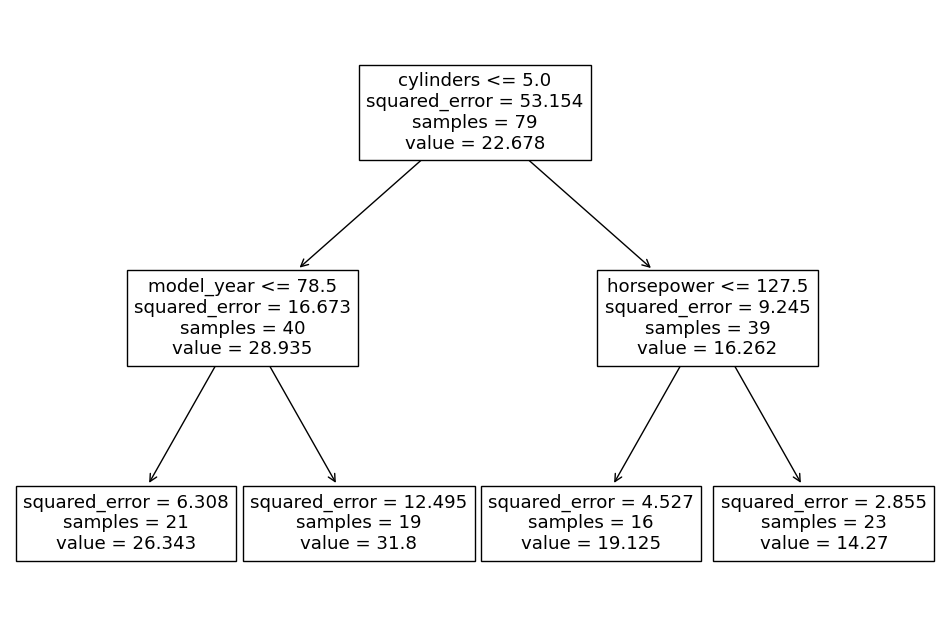

In [ ]:
# EXERCICE 7
# INSERT CODE HERE

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

modelDTR = DecisionTreeRegressor(max_depth=2)
modelDTR.fit(X_test, y_test)


plt.figure(figsize=(12, 8))
plot_tree(modelDTR,
          feature_names= X.columns)
plt.show()



# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
# Load in the Penguins dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Exercice 1
# INSERT CODE HERE

df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['species'] = df['species'].factorize()[0]

<ipython-input-22-d09a2b968a9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].factorize()[0]


In [ ]:
df['island'] = df['island'].factorize()[0]

<ipython-input-23-0092cebe8966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = df['island'].factorize()[0]


In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [ ]:
# Exercice 2
# INSERT CODE HERE


X = df.select_dtypes(['int', 'float']).columns
X = df[X]

y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.20)

print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 333
The length of the train dataset is   : 266
The length of the test dataset is    : 67


# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [ ]:
# Exercice 3
# INSERT CODE HERE

from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier().fit(X_train, y_train)

modelDTC



DecisionTreeClassifier()

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE

Xpredict = modelDTC.predict(X_test)
Xpredict


array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [ ]:
# Exercice 5
# INSERT CODE HERE

print(modelDTC.score(X_train, y_train))
print(modelDTC.score(X_test, y_test))



0.9962406015037594
0.8805970149253731


In [ ]:
train_accuracy = accuracy_score(y_train, Xpredict)
train_accuracy

0.7293233082706767

# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [ ]:
# Exercice 6
# INSERT CODE HERE

for columns_names, modeldtc in zip(X.columns, modelDTC.feature_importances_):
  print(f"{columns_names} : {modeldtc * 100:.2f}%")


species : 0.45%
island : 0.00%
bill_length_mm : 8.95%
bill_depth_mm : 49.41%
flipper_length_mm : 3.73%
body_mass_g : 37.45%


In [ ]:
modelDTC.feature_importances_

array([0.00451766, 0.        , 0.08952373, 0.49414646, 0.0373245 ,
       0.37448765])

In [ ]:
i = 0

while i < len(modelDTC.feature_importances_):
  columns_name = X.columns[i]
  modeldtc = modelDTC.feature_importances_[i]
  i += 1
  print(f"{columns_names} : {modeldtc * 100:.2f}%")


body_mass_g : 0.45%
body_mass_g : 0.00%
body_mass_g : 8.95%
body_mass_g : 49.41%
body_mass_g : 3.73%
body_mass_g : 37.45%


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

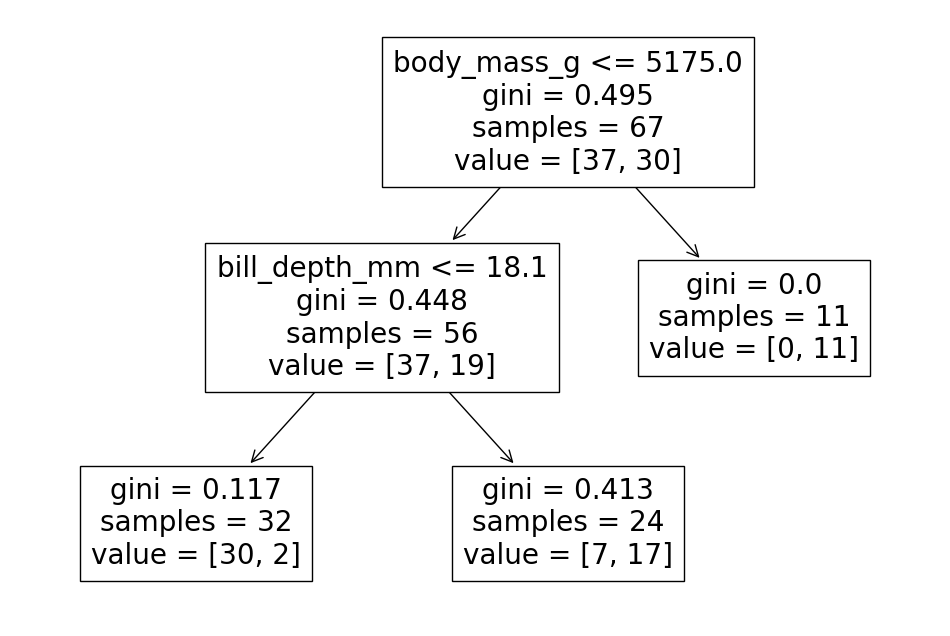

In [ ]:
# Exercice 7
# INSERT CODE HERE


modelDTC = DecisionTreeClassifier(max_depth=2)
modelDTC.fit(X_test, y_test)


plt.figure(figsize=(12, 8))
plot_tree(modelDTC,
          feature_names= X.columns)
plt.show()

# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

for i in range(1, 11):
    modelDTC = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Entraînez le modèle sur les données d'entraînement
    modelDTC.fit(X_train, y_train)

    # Faites des prédictions sur les données d'entraînement
    y_train_pred = modelDTC.predict(X_train)

    # Calculez et enregistrez la précision d'entraînement
    train_accuracy = accuracy_score(y_train, y_train_pred)
    list_of_accuracies_train.append(train_accuracy)

    # Faites des prédictions sur les données de test
    y_test_pred = modelDTC.predict(X_test)

    # Calculez et enregistrez la précision de test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    list_of_accuracies_test.append(test_accuracy)

# Affichez les précisions pour chaque valeur de max_depth
for max_depth, train_accuracy, test_accuracy in zip(range(1, 11), list_of_accuracies_train, list_of_accuracies_test):
    print(f"Max Depth: {max_depth}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Max Depth: 1, Train Accuracy: 0.7293, Test Accuracy: 0.7015
Max Depth: 2, Train Accuracy: 0.8947, Test Accuracy: 0.8209
Max Depth: 3, Train Accuracy: 0.9286, Test Accuracy: 0.8358
Max Depth: 4, Train Accuracy: 0.9361, Test Accuracy: 0.8657
Max Depth: 5, Train Accuracy: 0.9586, Test Accuracy: 0.8358
Max Depth: 6, Train Accuracy: 0.9737, Test Accuracy: 0.8060
Max Depth: 7, Train Accuracy: 0.9887, Test Accuracy: 0.8657
Max Depth: 8, Train Accuracy: 0.9925, Test Accuracy: 0.8806
Max Depth: 9, Train Accuracy: 0.9962, Test Accuracy: 0.8806
Max Depth: 10, Train Accuracy: 0.9962, Test Accuracy: 0.8806


In [ ]:
max_depth_values = range(1, 11)

list_of_accuracies_train = []
list_of_accuracies_test = []

for max_depth in max_depth_values:

#list_of_accuracies_train
    modelDTC = DecisionTreeClassifier(max_depth=max_depth, random_state=42)


    modelDTC.fit(X_train, y_train)


    y_train_pred = modelDTC.predict(X_train)


    train_accuracy = accuracy_score(y_train, y_train_pred)
    list_of_accuracies_train.append(train_accuracy)

#list_of_accuracies_test
    y_test_pred = modelDTC.predict(X_test)


    test_accuracy = accuracy_score(y_test, y_test_pred)
    list_of_accuracies_test.append(test_accuracy)

for max_depth, train_accuracy, test_accuracy in zip(max_depth_values, list_of_accuracies_train, list_of_accuracies_test):
    print(f"Max Depth: {max_depth}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Max Depth: 1, Train Accuracy: 0.7293, Test Accuracy: 0.7015
Max Depth: 2, Train Accuracy: 0.8947, Test Accuracy: 0.8209
Max Depth: 3, Train Accuracy: 0.9286, Test Accuracy: 0.8358
Max Depth: 4, Train Accuracy: 0.9361, Test Accuracy: 0.8657
Max Depth: 5, Train Accuracy: 0.9586, Test Accuracy: 0.8358
Max Depth: 6, Train Accuracy: 0.9737, Test Accuracy: 0.8060
Max Depth: 7, Train Accuracy: 0.9887, Test Accuracy: 0.8657
Max Depth: 8, Train Accuracy: 0.9925, Test Accuracy: 0.8806
Max Depth: 9, Train Accuracy: 0.9962, Test Accuracy: 0.8806
Max Depth: 10, Train Accuracy: 0.9962, Test Accuracy: 0.8806


In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE


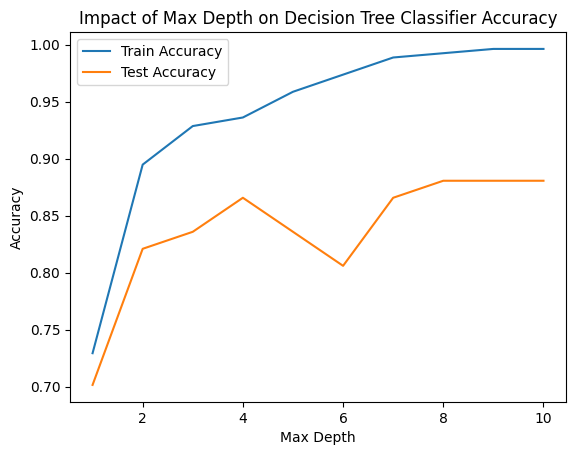

In [ ]:
# plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, list_of_accuracies_train, label='Train Accuracy')
plt.plot(max_depth_values, list_of_accuracies_test, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Impact of Max Depth on Decision Tree Classifier Accuracy')
plt.legend()
plt.show()